# UNAD
## Luis Alberto Salcedo Salas,
### Mall Customer Data - Hierarchical Clustering
    
__Pasos de la actividad__

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
1. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
1. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
1. Entrenar el modelo configurando los diferentes hiperparámetros
1. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
1. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
1. Interpretar, analizar y documentar los resultados obtenidos

In [4]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

from sklearn.preprocessing import StandardScaler # Normalización de datos
from sklearn.cluster import AgglomerativeClustering # Modelos de aprendizaje no supervisado
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

### Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
# Carga y lectura de datos

Data = pd.read_csv('D:/Documentos/Universidad. Ing Sistemas/10 - Semestre/Análisis de datos/Tarea 4/Mall_Customers.csv')
Data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
# Verificación de los datos generales del dataset

Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Información del formato de la tabla

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [8]:
#Se elimina la columna CustomerID que no es relevante para el aprendizaje

Data = Data.drop(['CustomerID'], axis = 1)

In [9]:
# Se modifica el dataset para que valores Male sean iguales a 0 y valores Female sean iguales a 1 en la columna Gender

genderValues = Data['Gender'].value_counts()
print(genderValues)

Gender
Female    112
Male       88
Name: count, dtype: int64


In [10]:
Data['Gender'] = Data['Gender'].map({ 'Male': 0, 'Female': 1 })
genderValues = Data['Gender'].value_counts()
print(genderValues)

Gender
1    112
0     88
Name: count, dtype: int64


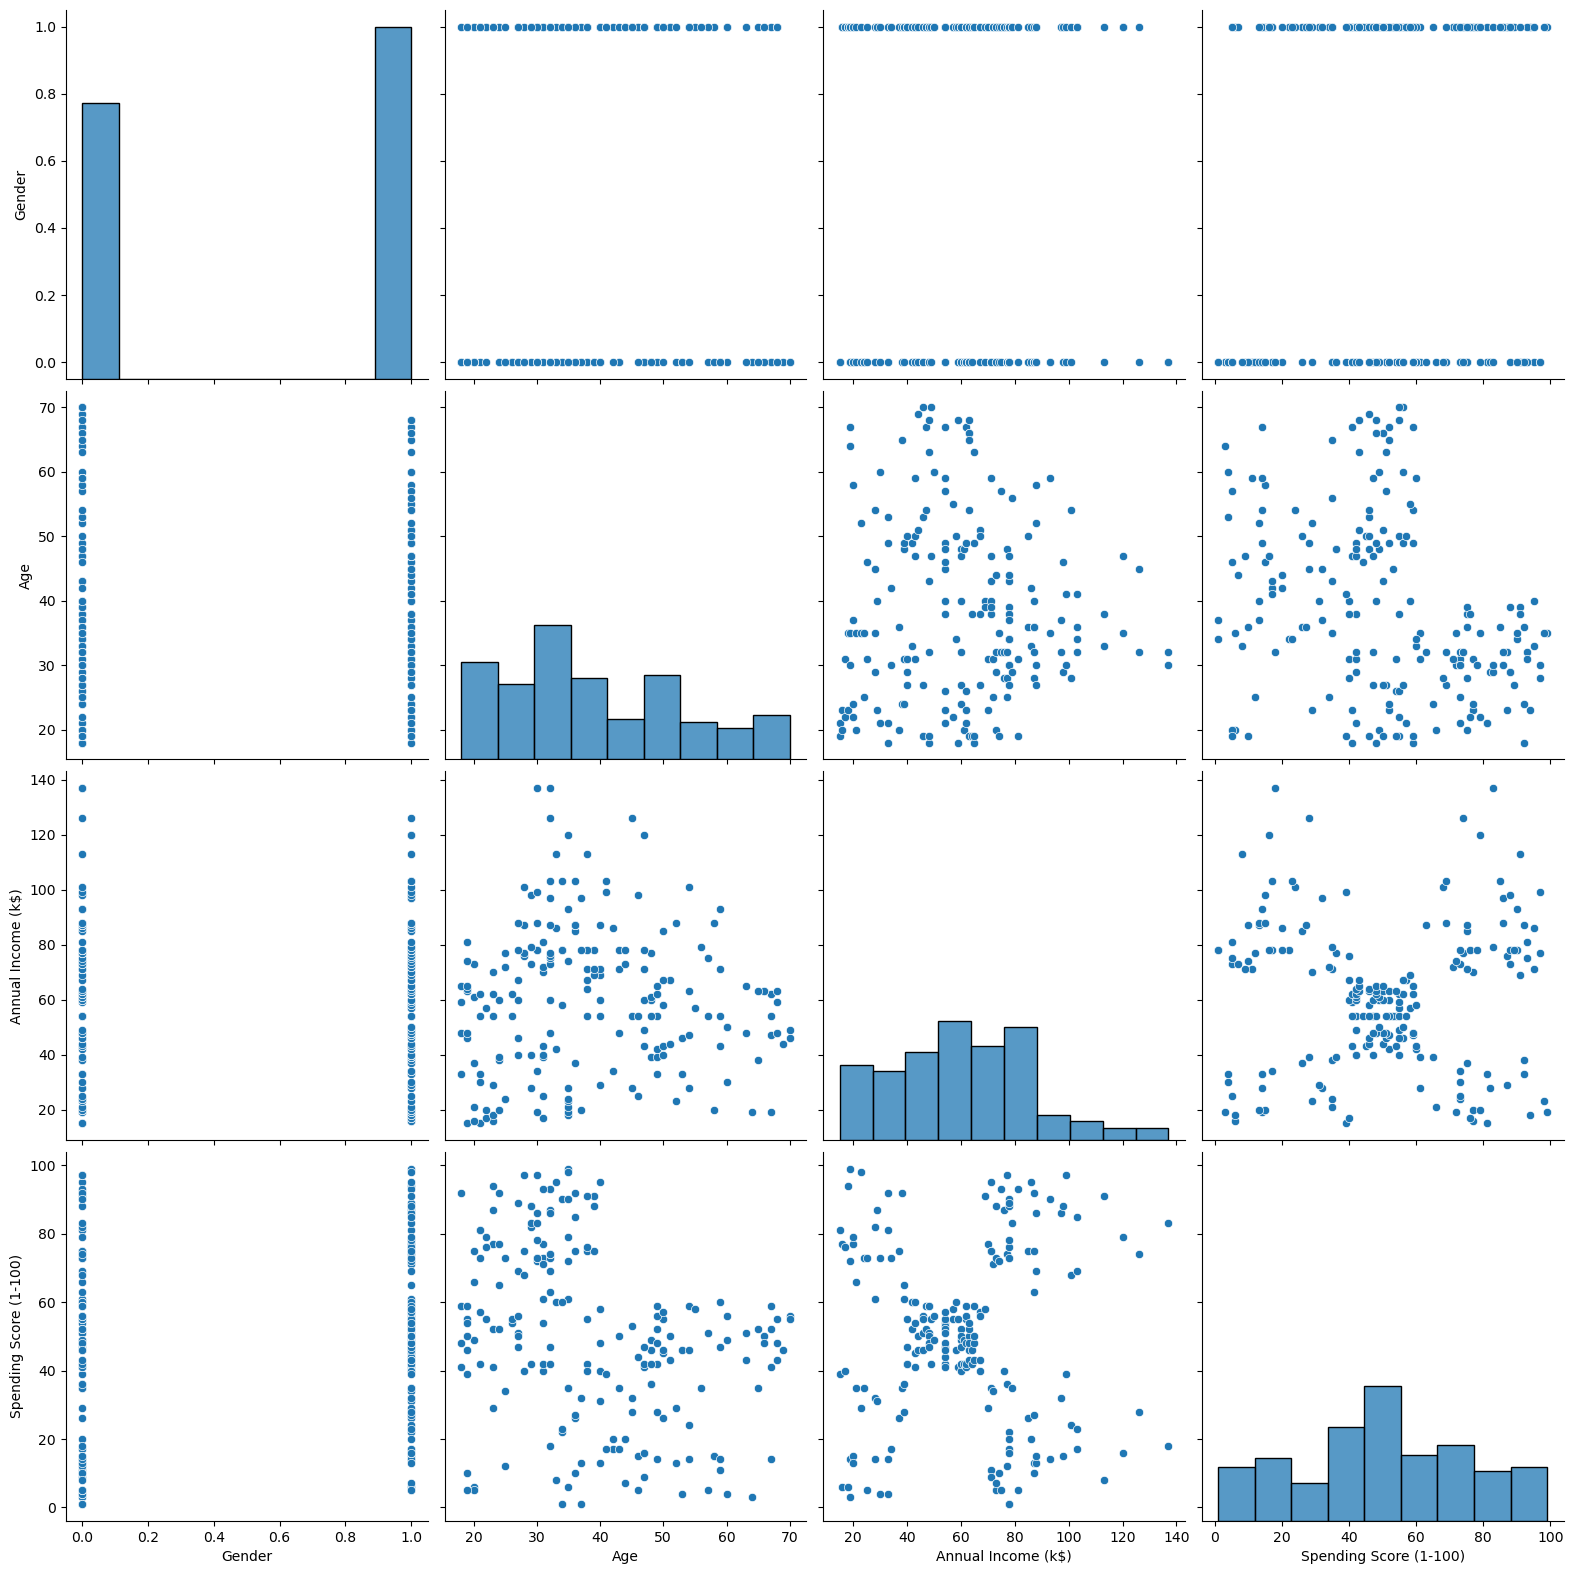

In [11]:
# Implementación de gráficos de dispersión en relación con los parámetros

sns.pairplot(Data, size=4,kind='scatter')

In [12]:
# Verificación numérica de correlación entre variables - Matriz de correlación

corr_matrix = Data.corr()
corr_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'IBox Plot Age')

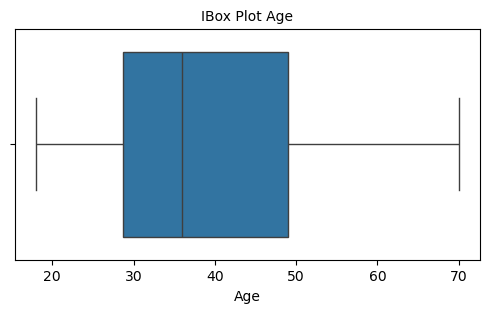

In [13]:
# Verificación de datos atípicos con diagrama de barras

plt.figure(figsize = (6, 3))
sns.boxplot(x = Data['Age'])
plt.title('IBox Plot Age', fontsize = 10 )

Text(0.5, 1.0, 'IBox Plot Annual Income (k$)')

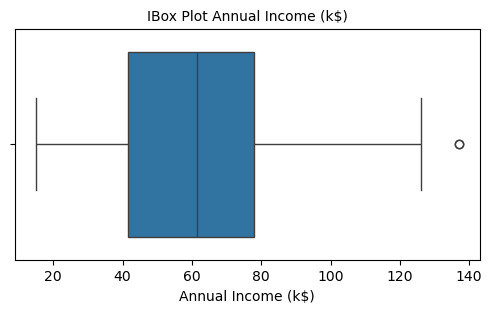

In [14]:
# Verificación de datos atípicos con diagrama de barras

plt.figure(figsize = (6, 3))
sns.boxplot(x = Data['Annual Income (k$)'])
plt.title('IBox Plot Annual Income (k$)', fontsize = 10)

Text(0.5, 1.0, 'IBox Plot Spending Score (1-100)')

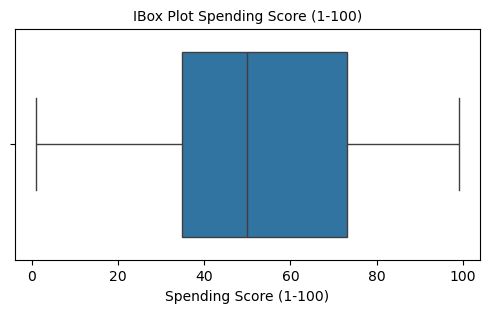

In [15]:
# Verificación de datos atípicos con diagrama de barras

plt.figure(figsize = (6, 3))
sns.boxplot(x = Data['Spending Score (1-100)'])
plt.title('IBox Plot Spending Score (1-100)', fontsize = 10)

In [16]:
# Estandarización de datos

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Data), columns = Data.columns)
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


# Hierarchical Clustering
### Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

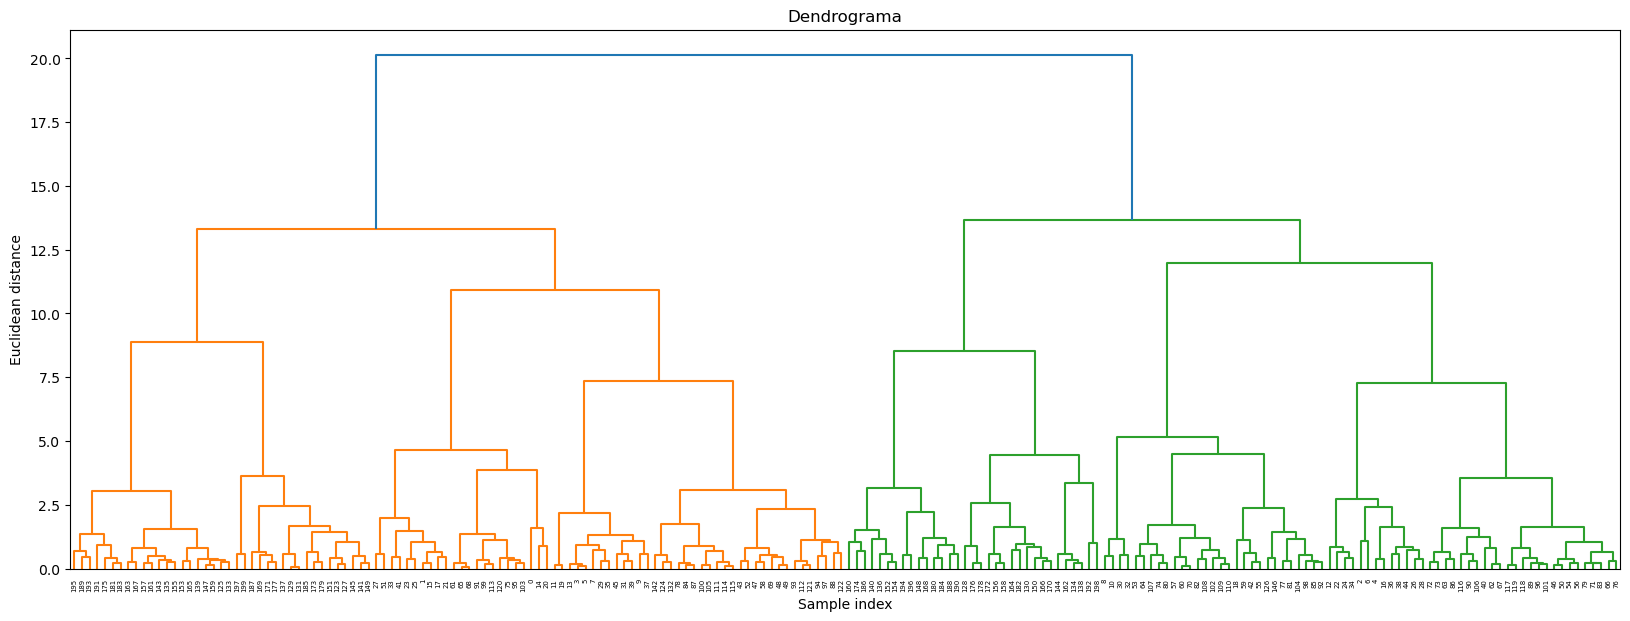

In [22]:
# Visualización de Dendrograma para comprender la aglomeración de datos

ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

### Entrenar el modelo configurando los diferentes hiperparámetros
### Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

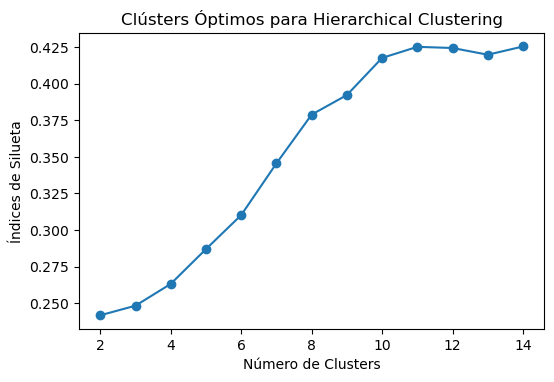

In [23]:
# Evaluación de selección de clusters basados en los resultados del coeficiente de silueta entre cada uno de ellos

range_n_clusters = range(2, 15)
silhouette_values = []
for num_clusters in range_n_clusters:
    hierCluster = AgglomerativeClustering(n_clusters = num_clusters)
    cluster_labels = hierCluster.fit_predict(X)
    silhouette_value = silhouette_score(X, cluster_labels)
    silhouette_values.append(silhouette_value)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, silhouette_values, marker='o')
ax.set_title('Clústers Óptimos para Hierarchical Clustering')
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Índices de Silueta');

Conforme a lo identificado en la gráfica, los números óptimos de clústers son **11** y **14** con un índice de silueta de **0.425** por lo cual se realizará el ejercicio con **11** clústers.

In [24]:
# Se inicializa el Hierarchical Clustering, deteniendo el proceso de aglomerado al obtener 11 clústers
# Se establecen valores y colores para la identificación de clústers

hier_clustering = AgglomerativeClustering(n_clusters = 11).fit(X)
labels = hier_clustering.labels_

colores = ['red', 'green', 'cyan', 'yellow', 'blue', 'black', 'grey', 'purple', 'orange', 'pink', 'brown']
asignar = []
for row in labels:
    asignar.append(colores[row])

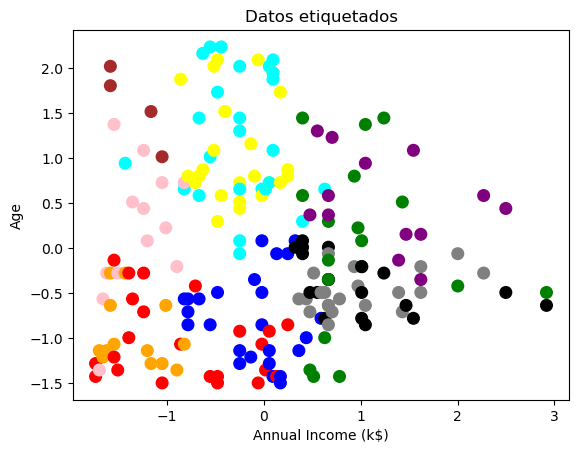

In [28]:
# Gráfico Annual Income (k$) & Age

f1 = X['Annual Income (k$)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

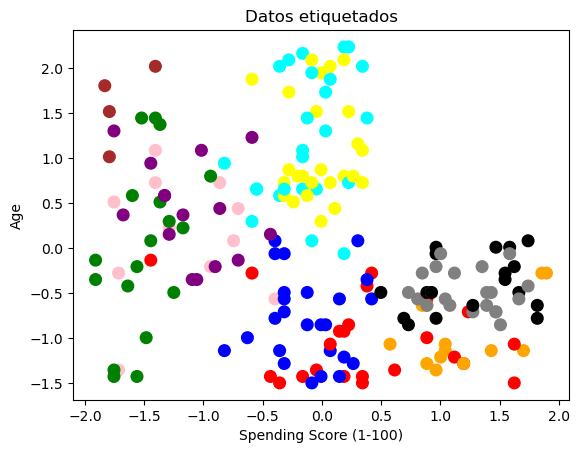

In [30]:
# Gráfico Spending Score (1-100) & Age

f1 = X['Spending Score (1-100)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

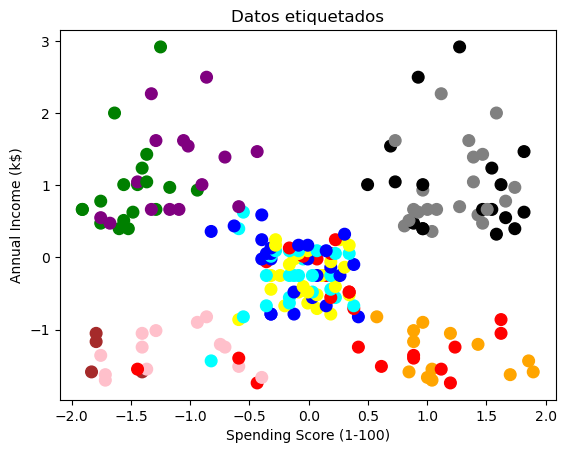

In [31]:
# Gráfico Spending Score (1-100) & Annual Income (k$)

f1 = X['Spending Score (1-100)'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [32]:
# Calcular medidas de calidad para Clustering Jerárquico
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.42517748630372254
Índice de Calinski-Harabasz: 87.50301145902957
Davies-Bouldin Index: 0.7987123145195121


In [33]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.5956238167278256, array([ 4.64278735, 20.11762535, 10.9330832 , ..., 20.11762535,
        0.5647686 , 20.11762535]))


### Interpretar, analizar y documentar los resultados obtenidos

Se realiza el proceso de aprendizaje no supervisado con el modelo Clustering Jerárquico. Inicialmente se verifica el dendrograma para comprender la aglomeración de los datos y los posibles grupos de clústers a utilizar. Realizando una comparación respecto al índice de silueta con un rango de 2 a 14 clústers se identifica que al utilizar **11** u **14** clústers se obtiene el mayor valor de índice de silueta, sin embargo, es importante resaltar que es del **0.425** lo cual es una valor bajo que no brinda mayor confiabilidad. Esto se puede soportar a través de la matriz de correlación y las gráficas de dispersión que evidencian una gran variabilibidad entre datos con poca correlación entre los mismos.

La dispersión y clasificación que se evidencia en las últimas gráficas también soportan los bajos valores de silueta ya que no se identifican clústers claros en los grafos, se superponen varios datos con diferentes clústers.